### Cross Val

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, KFold



In [3]:
kf=KFold(n_splits=6, shuffle=True, random_state=42)
reg=LinearRegression()

In [ ]:
df=pd.read_csv('..\data\\diabetes_clean.csv')
df.head()
X=df.drop('glucose',axis=1).values
y=df['glucose'].values
print(type(X),type(y))
print(X.shape,y.shape)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(768, 8) (768,)


In [5]:
cv_results=cross_val_score(reg,X,y,cv=kf)

In [6]:
print(cv_results)
print(np.mean(cv_results) ,np.std(cv_results))
print(np.quantile(cv_results,[0.25,0.75]))

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
0.3190969786734479 0.0701532061011419
[0.26712705 0.38502028]


## Regularization

### Why Regularization
- Recall Linear regression minimizes a loss function
- It shooses a coeffcient , a, for each feature variable, plus b
- Large coffcients can lead to over fitting
- Regularizaation: Penalizes large coffcients

### Ridge Regression
- Loss function = OLS loss function + alpha*Sum(ai^2)
- Ridge penalzies large positive or negative coeefcients
- alpha: parameter we need to choose
- Picking alpha is simialr to piking k in KNN
- Hyperparameter: variable used to optimize model parameters
- alpha controls model complexity:
    - alpha=0=OLS (can lead to over fitting)
    - high alpha: can lead to under fitting

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
scores=[]
X=df.drop('glucose',axis=1).values
y=df['glucose'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X,y)
   # cv_results=cross_val_score(reg,X,y,cv=kf)
    y_pred=ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
print(scores)

[0.3317390920848763, 0.3314525629151295, 0.328359968776715, 0.2939103463549484, 0.20073573562643166]


### Lasso Regression
- Loss function = OLS loss function + alpha*Sum(abs(ai))
- Lasso can select important features of a dataset
- Shrinks the coeffcients of less imporant features to zero
- Features not shrunk to zero are selected by lasso

In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
scores=[]
X=df.drop('glucose',axis=1).values
y=df['glucose'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X,y)
   # cv_results=cross_val_score(reg,X,y,cv=kf)
    y_pred=lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))
print(scores)

[0.33263440752740736, 0.3194397477593336, 0.17334714996914924, 0.09988918256837198, 0.03228579825200084]


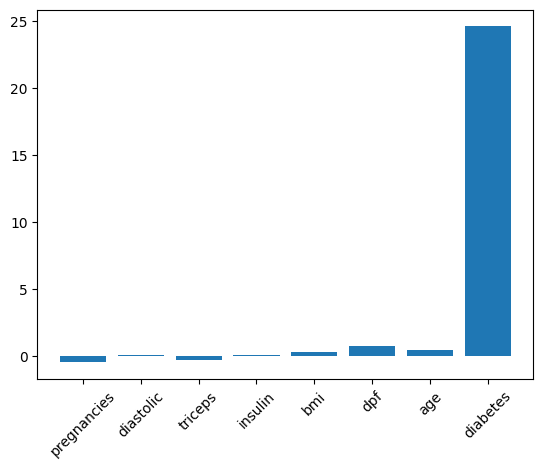

In [9]:
names=df.drop('glucose',axis=1).columns
lasso=Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_

plt.bar(names,lasso_coef)
plt.xticks(rotation=45)
plt.show()

